In [1]:
import gym
import environment.qmaze

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
#tf.enable_eager_execution()

import trfl
import numpy as np
import random

/home/jonas/tensorflow/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)


/home/jonas/tensorflow/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


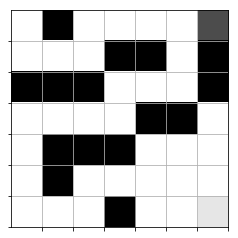

In [2]:
env = gym.make('QMaze-v0', rewards = [1.0, -0.75, -0.04,-0.04])
import gym.core
class EWrap(gym.core.ObservationWrapper):
    def observation(self, observation):
        return self.env.state[0] * 7 + self.env.state[1]
    
env = EWrap(env)


env.reset()
env.render()

In [3]:
gamma = 0.95
epsilon = 0.1
lr = 0.2
tep_max = 10000

Q = np.random.rand(49,4)

num_episodes = 1000


def choose_action(state):
    if random.random() < epsilon:
        return random.randrange(4)
    
    return np.argmax(Q[state, :], 0)



for _ in range(num_episodes):
    s = env.reset()
    done = False
    tep = 0
    
    while not done and tep < tep_max:
        a = choose_action(s)
        snew, reward, done, _ = env.step(a)
        
        if done:
            Q[s, a] += lr * (reward - Q[s, a])
            
        else:
            Q[s, a] += lr * (reward + gamma * np.max(Q[snew, :], 0) - Q[s, a])
                             
        s = snew
        tep += 1
        
Qtrue = Q.reshape((7,7,-1))

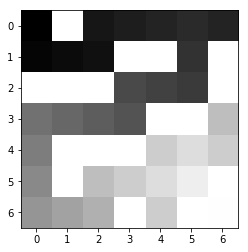

[[1.  0.  1.  1.  1.  1.  1. ]
 [1.  0.5 1.  0.  0.  1.  0. ]
 [0.  0.  0.  1.  1.  1.  0. ]
 [1.  1.  1.  1.  0.  0.  1. ]
 [1.  0.  0.  0.  1.  1.  1. ]
 [1.  0.  1.  1.  1.  1.  1. ]
 [1.  1.  1.  0.  1.  1.  1. ]]


In [4]:
# Print value function
V = np.max(Q, 1).reshape((7,7))

# Remove maze
min_v = np.min(V)
max_v = np.max(V)
V = (V - min_v) / (max_v - min_v)
V[env.unwrapped.maze == 0] = 1

img = plt.imshow(V, interpolation='none', cmap='gray')
plt.show()

print(env.unwrapped.maze)

In [5]:
from common import make_agent
import experiments.qmaze_dqn

agent = make_agent('deepq-qmaze')

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216

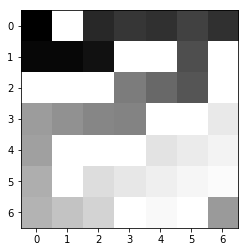

In [6]:
env = gym.make('QMaze-v0', rewards = [1.0, 0.0, 0.0, 0.0]) #rewards = [1.0, -0.75, -0.04,-0.04])
Q = np.zeros((7,7,4), dtype = np.float32)
for y in range(7):
    for x in range(7):
        observation = env.reset((x,y,))
        Q[x,y,:] = agent.q(observation)
            
V = np.max(Q, 2)

min_v = np.min(V)
max_v = np.max(V)
V = (V - min_v) / (max_v - min_v)

# Remove maze
V[env._maze == 0] = 1

img = plt.imshow(V, interpolation='none', cmap='gray')
plt.show()

In [7]:
correctness = np.mean(np.argmax(Q, 2) == np.argmax(Qtrue, 2))
print(correctness)

0.6530612244897959


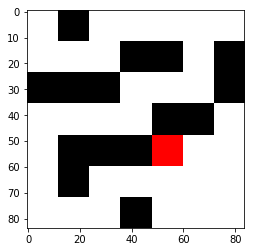

In [8]:
import gym
import environment.qmaze
env = gym.make('Maze-v0', rewards = [1.0, 0.0, 0.0, 0.0])
state = env.reset()


img = plt.imshow(state)
plt.show()

In [9]:
from supervised import maze_utils as MU
env = gym.make('QMaze-v0', rewards = [1.0, 0.0, 0.0, 0.0])
env.reset()

actions, distances = MU.build_graph_from_qmaze(env)
def nstr(i):
    if i < 10:
        return '0' + str(i)
    return str(i)

# print shortest distances
for y in range(7):
    print(','.join([nstr(distances[y, x]) if env.maze[y, x] != 0.0 else '--' for x in range(7)]))

actionmap = 'lurd'
action_print = np.array([actionmap[x] for x in np.argmax(actions, 2).reshape((-1))]).reshape((7,7,))
print(action_print)

26,--,22,21,20,19,20
25,24,23,--,--,18,--
--,--,--,15,16,17,--
11,12,13,14,--,--,03
10,--,--,--,04,03,02
09,--,05,04,03,02,01
08,07,06,--,02,01,00
[['d' 'l' 'r' 'r' 'r' 'd' 'l']
 ['r' 'r' 'u' 'l' 'l' 'd' 'l']
 ['l' 'l' 'l' 'd' 'l' 'l' 'l']
 ['d' 'l' 'l' 'l' 'l' 'l' 'd']
 ['d' 'l' 'l' 'l' 'r' 'r' 'd']
 ['d' 'l' 'r' 'r' 'r' 'r' 'd']
 ['r' 'r' 'u' 'l' 'r' 'r' 'd']]
